In [7]:
import ot
import ot.plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

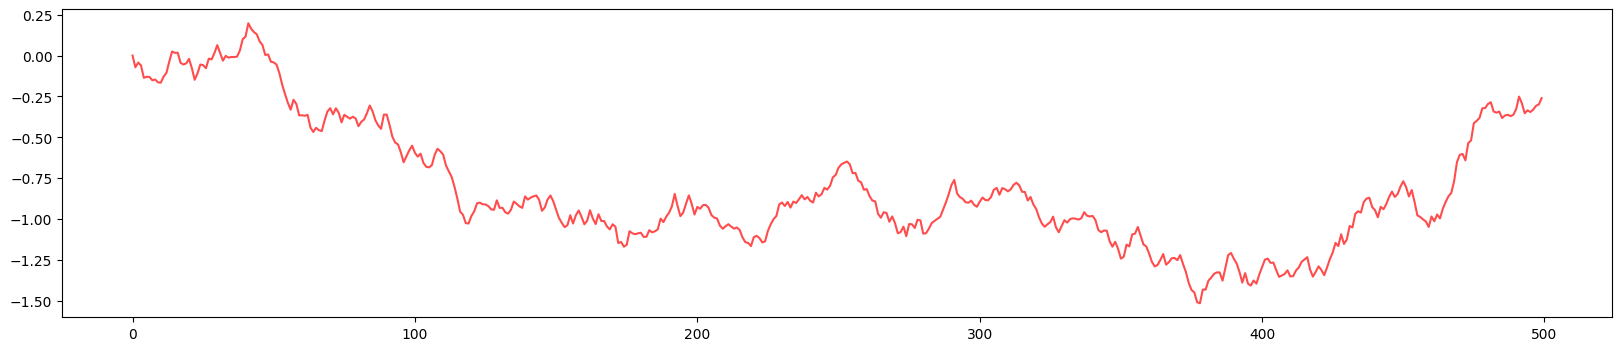

In [8]:
data = np.loadtxt("Langevin_1D.txt")
plt.figure(1, figsize=(20, 4))
plt.plot(np.arange(500), data[0:500], 'r', alpha=0.7) #Plots original data

In [9]:
#wass_maps.py
BIN_COUNT = 100
DATA_COUNT = 500
SAMPLES_PER_BIN = DATA_COUNT / BIN_COUNT
bins = np.array_split(data[0:DATA_COUNT], BIN_COUNT)
#map_data = [np.linalg.norm(ot.lp.emd_1d(bins[i], bins[i + 1])) for i in range(BIN_COUNT - 1)]
# pyright: ignore[reportGeneralTypeIssues]

#fig, ax = plt.subplots()
#ax.scatter(SAMPLES_PER_BIN * np.arange(BIN_COUNT - 1), map_data)
#fig.savefig('dets.png')

#plt.show()

In [10]:
dw = [ot.emd2_1d(bins[i], bins[i + 1]) for i in range(len(bins)-1)]
dw[0:5]

[0.007809370871330953,
 0.0069859353669583036,
 0.005112905189466755,
 0.004000315591473009,
 0.002588923576323212]

In [11]:
for i in range(5):
    print("bin ", i, ": ", bins[i]) #list points in bin i
    print("bin ", i+1, ":",  bins[i+1]) #list points in bin j
    print("Distance matrix:\n", ot.dist(bins[i].reshape(5,1), bins[i+1].reshape(5,1)))
    """
    returns transport matrix -- nxn representing how much density of each point should go to another point
    notice in our case the norm is around the same because it is just a rescaled permutation matrix
    since each on each point is a uniformly weighted dirac mass, the weights in the transport matrix should
    just all be equal (so it sums to 1)
    """
    print("Transport plan:\n", ot.lp.emd_1d(bins[i], bins[i+1])) 
    print(np.linalg.norm(ot.lp.emd_1d(bins[i], bins[i+1])))
    print("\n")


bin  0 :  [ 0.         -0.07166274 -0.04273706 -0.06063698 -0.13616368]
bin  1 : [-0.12991662 -0.13070239 -0.1512775  -0.14635417 -0.16345251]
Distance matrix:
 [[1.68783290e-02 1.70831151e-02 2.28848812e-02 2.14195427e-02
  2.67167217e-02]
 [3.39351504e-03 3.48568055e-03 6.33850977e-03 5.57880968e-03
  8.42536135e-03]
 [7.60027637e-03 7.73789963e-03 1.17810267e-02 1.07365054e-02
  1.45722191e-02]
 [4.79966865e-03 4.90916153e-03 8.21570298e-03 7.34743603e-03
  1.05710319e-02]
 [3.90257400e-05 2.98256937e-05 2.28427424e-04 1.03846023e-04
  7.44679933e-04]]
Transport plan:
 [[0.2 0.  0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]
0.447213595499958


bin  1 :  [-0.12991662 -0.13070239 -0.1512775  -0.14635417 -0.16345251]
bin  2 : [-0.16601135 -0.12876402 -0.10549179 -0.03708508  0.02494569]
Distance matrix:
 [[1.30282918e-03 1.32849787e-06 5.96572252e-04 8.61769567e-03
  2.39823376e-02]
 [1.24672245e-03 3.75728931e-06 6.35574182e-

# Interpolation

Goal: differentiate the transport maps. We will use Interpolation to extend them to the continuous setting.

In [12]:
from scipy import interpolate
from scipy.interpolate import BarycentricInterpolator, NearestNDInterpolator, CubicSpline


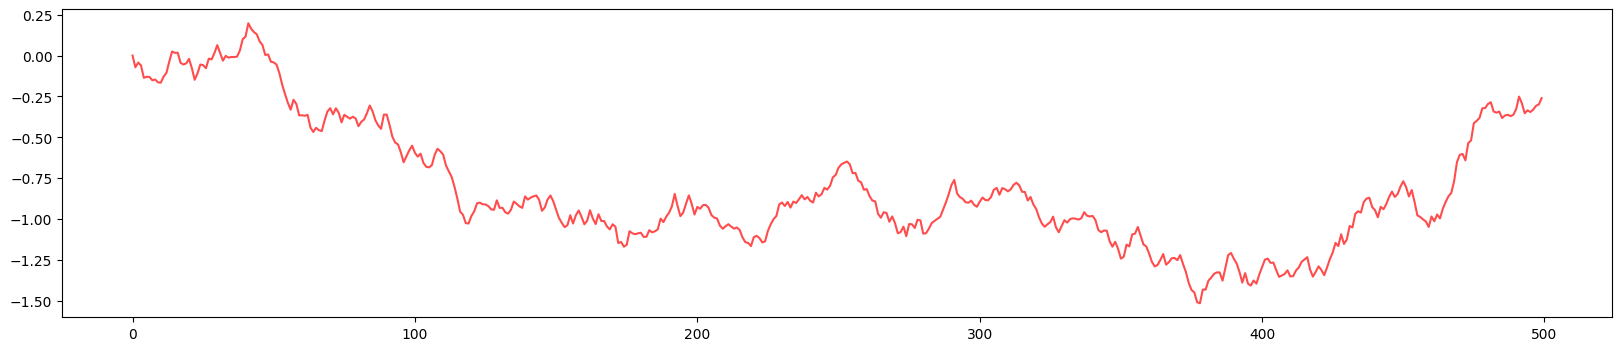

In [13]:
data = np.loadtxt("Langevin_1D.txt")
plt.figure(1, figsize=(20, 4))
plt.plot(np.arange(500), data[0:500], 'r', alpha=0.7) #Plots original data

# Nearest Neighbor

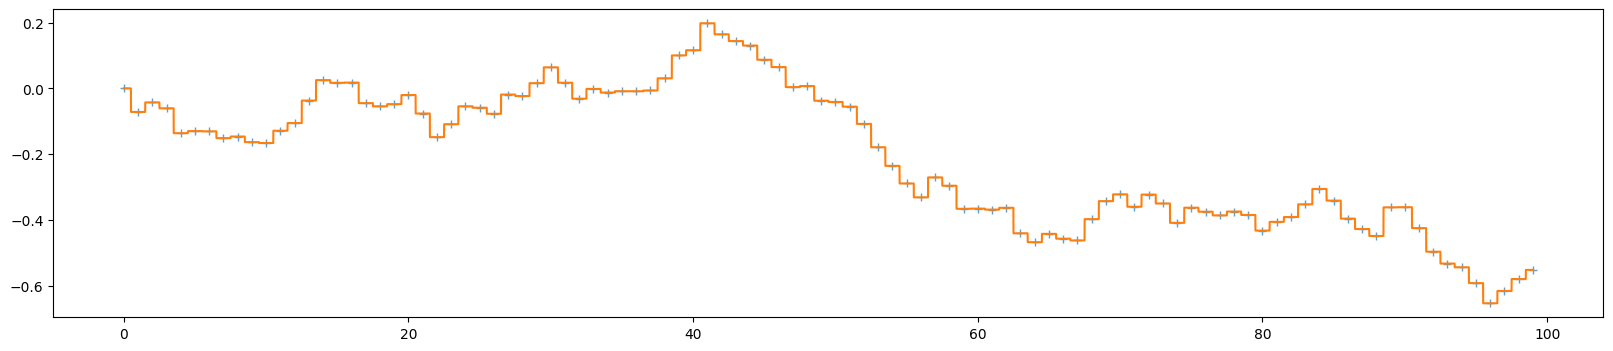

In [14]:
NUM_POINTS_NN = np.arange(100)
DATA_PTS_NN = data[0:100]
y = np.zeros(5000000)

interp_NN = NearestNDInterpolator(list(zip(NUM_POINTS_NN, y)), DATA_PTS_NN)
tmodel = np.linspace(NUM_POINTS_NN.min(), NUM_POINTS_NN.max(), 1000000)
plt.figure(1, figsize=(20, 4))
plt.plot(NUM_POINTS_NN, DATA_PTS_NN, '+', alpha=0.7)

plt.plot(tmodel, interp_NN.__call__(list(zip(tmodel, y))))

# Barycentric

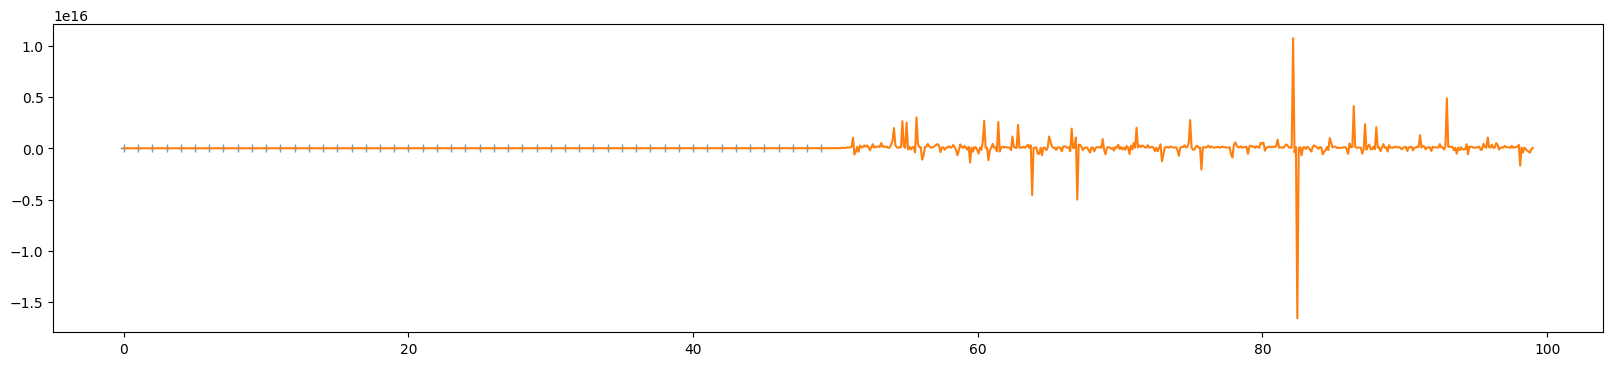

In [15]:
NUM_POINTS = np.arange(50)
DATA_PTS = data[0:50]

interp = BarycentricInterpolator(NUM_POINTS, DATA_PTS)
tmodel = np.linspace(NUM_POINTS_NN.min(), NUM_POINTS_NN.max(), 1000)
plt.figure(1, figsize=(20, 4))
plt.plot(NUM_POINTS, DATA_PTS, '+', alpha=0.7)

plt.plot(tmodel, interp.__call__(tmodel))

# Cubic Spline

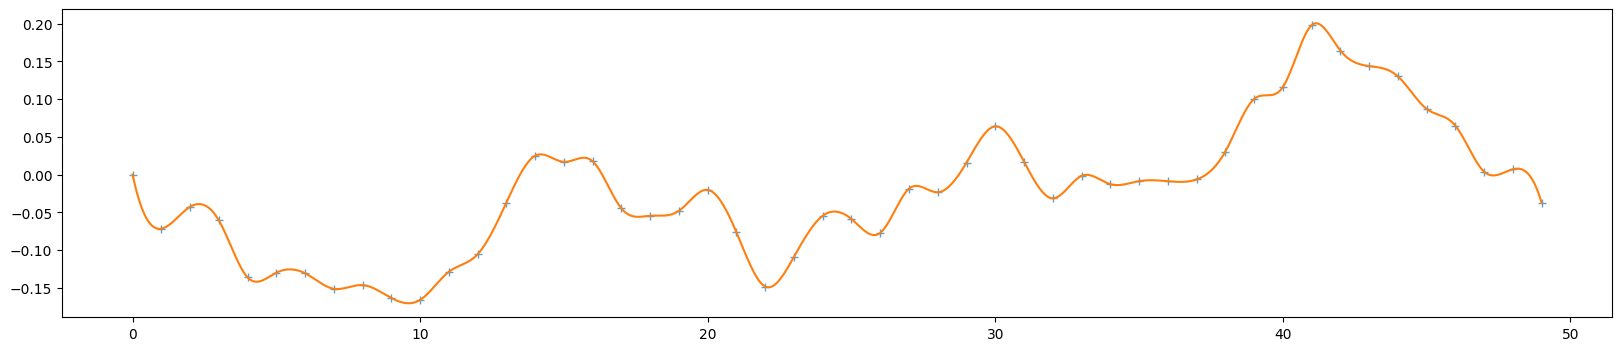

In [16]:
NUM_POINTS_CSPL = np.arange(50)
DATA_PTS_CSPL = data[0:50]

interp_cspl = CubicSpline(NUM_POINTS_CSPL, DATA_PTS_CSPL)
tmodel = np.linspace(NUM_POINTS_CSPL.min(), NUM_POINTS_CSPL.max(), 1000)

plt.figure(1, figsize=(20, 4))
plt.plot(NUM_POINTS, DATA_PTS, '+', alpha=0.7)
plt.plot(tmodel, interp_cspl(tmodel))